In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

def list_csv_files(directory):
    files = os.listdir(directory)
    csv_files = [file for file in files if file.endswith('.csv')]
    return csv_files

def clean_price_column(column):
    return column.replace('[₹,]', '', regex=True).astype(float)

#path
directory_path = '/content/drive/MyDrive/1Flipkart furniture/flipkartfurn'
csv_files = list_csv_files(directory_path)

if not csv_files:
    print("No CSV files found in the directory.")
else:
    file_path = os.path.join(directory_path, csv_files[0])
    df = pd.read_csv(file_path)

    print("First few rows of the dataset:")
    print(df.head())

    print("\nGeneral information about the dataset:")
    print(df.info())

    # Cleaning
    df['discounted_price'] = clean_price_column(df['discounted_price'])
    df['original_price'] = clean_price_column(df['original_price'])

    # Summary
    print("\nSummary statistics for numerical attributes:")
    print(df[['discounted_price', 'original_price']].describe())

    # Distribution of furniture types
    print("\nDistribution of furniture types:")
    print(df['furniture_type'].value_counts())

    #missing values
    print("\nMissing values in the dataset:")
    print(df.isnull().sum())

    # Correlation: discounted_price and original_price
    print("\nCorrelation between discounted_price and original_price:")
    print(df[['discounted_price', 'original_price']].corr())



First few rows of the dataset:
   Unnamed: 0 furniture_type  \
0           0          Table   
1           1          Table   
2           2          Table   
3           3          Table   
4           4          Table   

                                                name discounted_price  \
0  HF HARSH FASHION Smart Multi-Purpose Laptop Ta...             ₹439   
1            OANGO wooden Wood Portable Laptop Table             ₹499   
2  Smarts collection Wooden Plant Stand for Balco...             ₹474   
3  Featherlite Flip foldable Engineered Wood Offi...           ₹7,725   
4  wood city handicrafts wooden round side coffee...             ₹391   

  original_price                                    product_details  
0         ₹1,272  [<li class="_21Ahn-">Primary Material: Wood</l...  
1         ₹1,966  [<li class="_21Ahn-">Primary Material: Wood</l...  
2           ₹999  [<li class="_21Ahn-">Free-Style</li>, <li clas...  
3         ₹9,624  [<li class="_21Ahn-">Material: Particle

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_poly_pred = poly_reg.predict(X_poly_test)

print("Polynomial Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_poly_pred))
print("R^2 Score:", r2_score(y_test, y_poly_pred))

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_tree_pred = tree_reg.predict(X_test)

print("\nDecision Tree Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_tree_pred))
print("R^2 Score:", r2_score(y_test, y_tree_pred))

Polynomial Regression Results:
Mean Squared Error: 1811086.0124657275
R^2 Score: 0.8717664358636726

Decision Tree Regression Results:
Mean Squared Error: 1942491.2267069768
R^2 Score: 0.8624623173114501


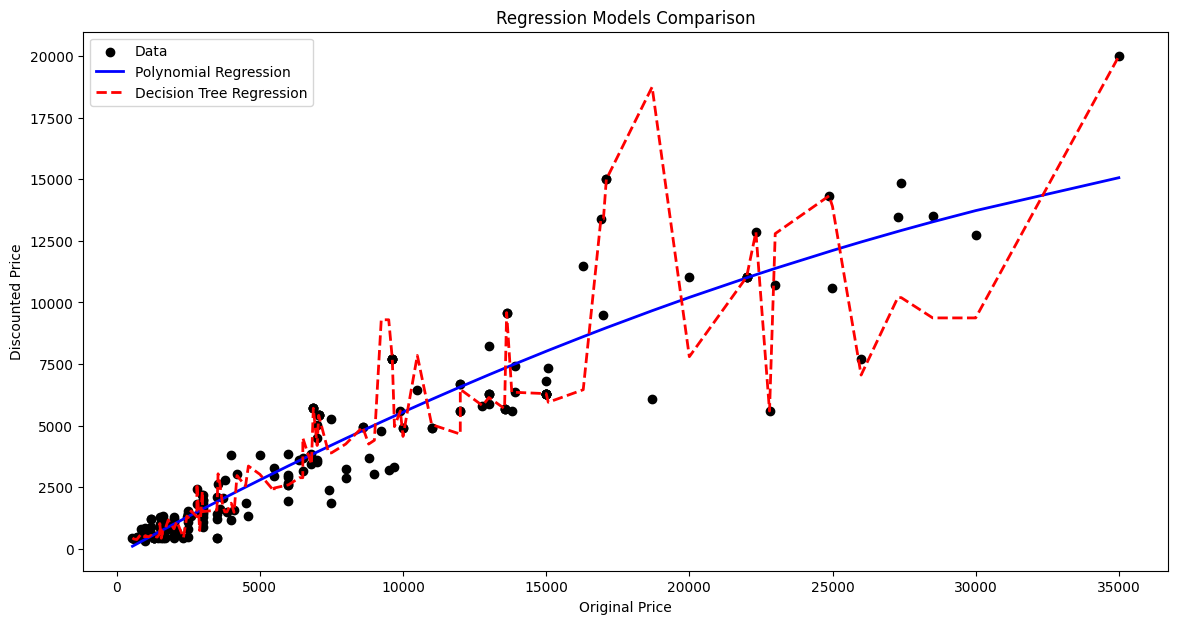

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

plt.scatter(X_test, y_test, color='black', label='Data')

# Plot Polynomial Regression results
X_plot = X_test.sort_values(by='original_price')
y_poly_pred_plot = poly_reg.predict(poly.transform(X_plot))
plt.plot(X_plot, y_poly_pred_plot, color='blue', linewidth=2, label='Polynomial Regression')

# Plot Decision Tree Regression results
y_tree_pred_plot = tree_reg.predict(X_plot)
plt.plot(X_plot, y_tree_pred_plot, color='red', linestyle='dashed', linewidth=2, label='Decision Tree Regression')

plt.xlabel('Original Price')
plt.ylabel('Discounted Price')
plt.title('Regression Models Comparison')
plt.legend()
plt.show()

Polynomial Regression Results:
Mean Squared Error: 1811086.0124657275
R^2 Score: 0.8717664358636726

Decision Tree Regression Results:
Mean Squared Error: 1942491.2267069768
R^2 Score: 0.8624623173114501


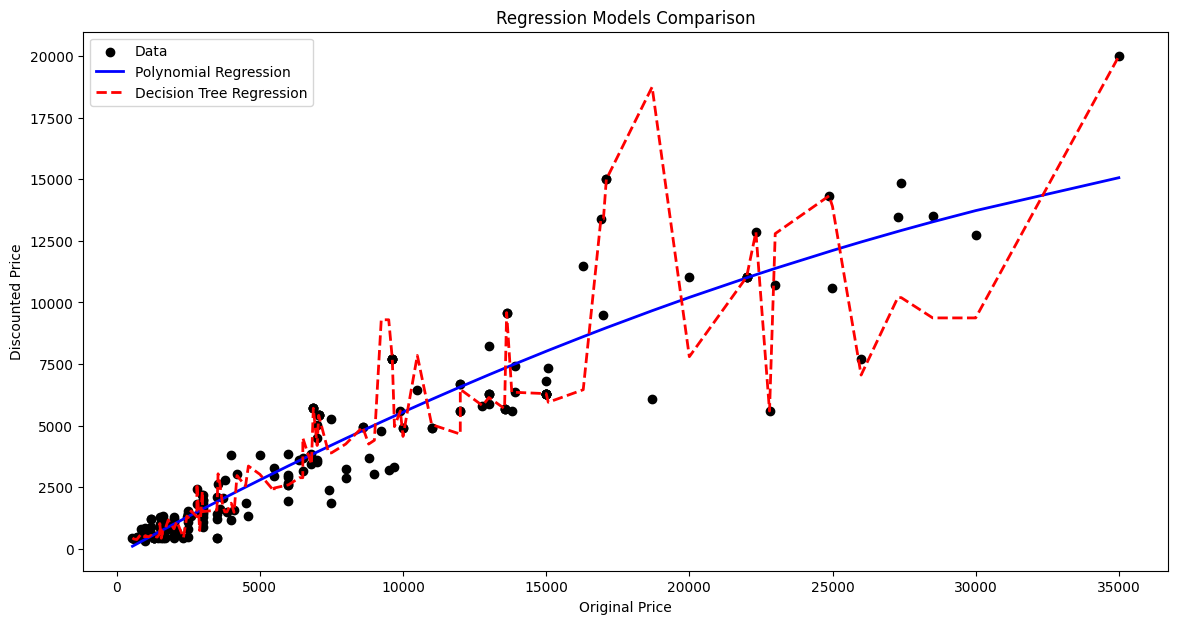

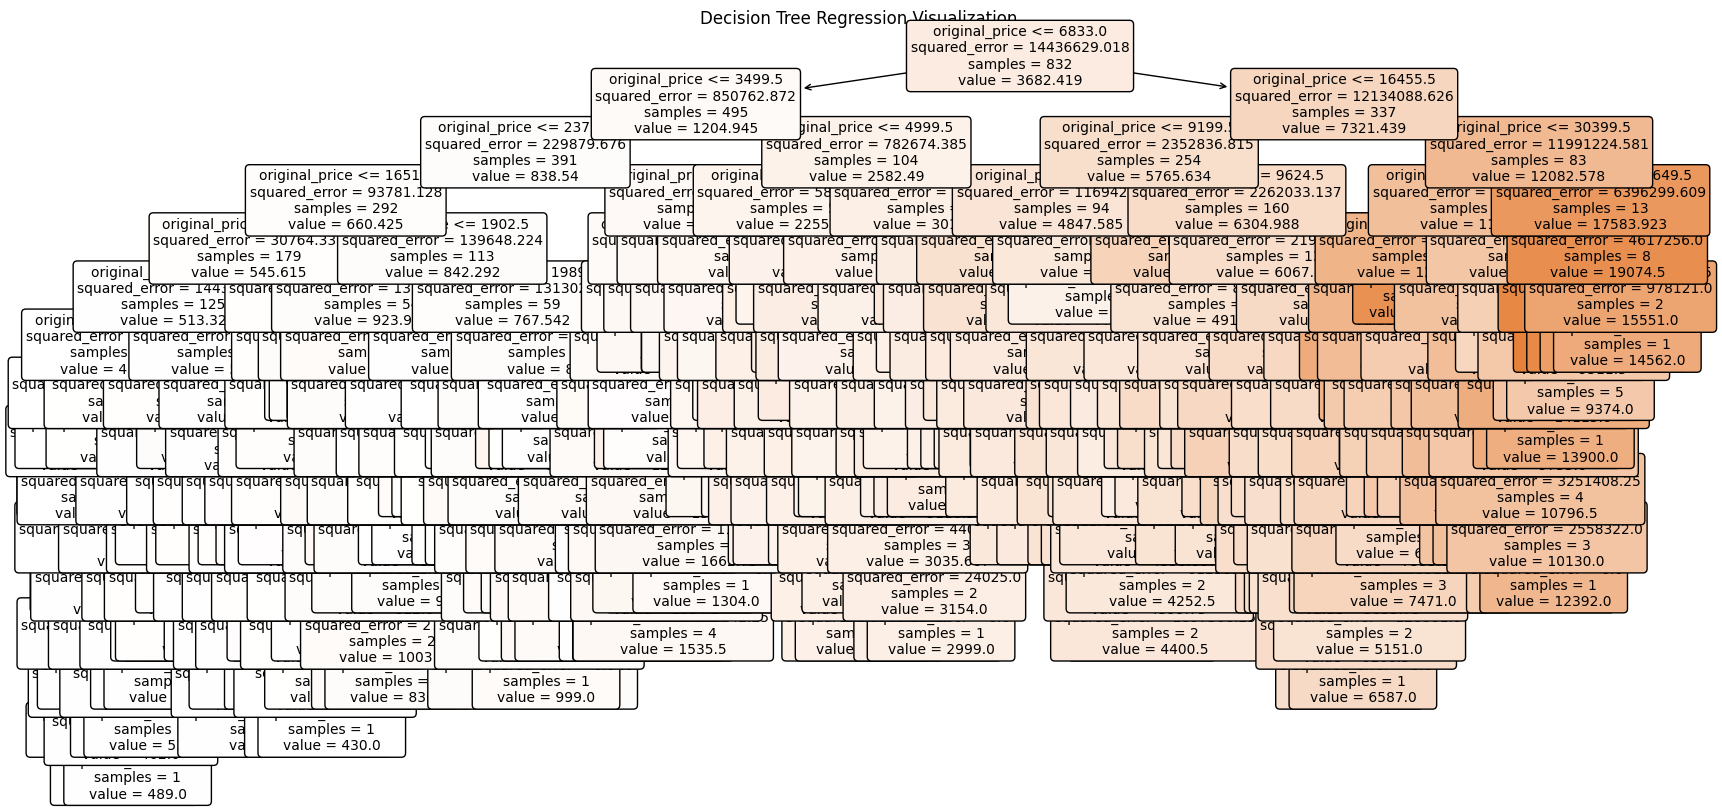